In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [11]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv', index_col=0)

#Cleaning all the column titles to switch with PE8 Format

customer_df.columns = customer_df.columns.str.lower()

customer_df.columns = customer_df.columns.str.replace(' ', '_', regex=False)

customer_df = customer_df.rename(columns={
   'employmentstatus': 'employment_status'
})

display(customer_df)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [13]:
#First I need to convert the column at the date format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df

#Then, I split date in year and month
customer_df['Month'] = customer_df['effective_to_date'].dt.month
customer_df['Month']

customer_df1 = customer_df.drop('effective_to_date', axis=1)

In [14]:
#I split now categorical and numerical data

numerical_df = customer_df.select_dtypes(include=np.number)
categorical_df = customer_df.select_dtypes(include=np.object)

In [15]:
#Check if I've all my data in numerical and no column is missing

numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,Month
Customer,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147,2
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935,1
AI49188,12887.431650,48767,108,18,38,0,2,566.472247,2
WW63253,7645.861827,0,106,18,65,0,7,529.881344,1
HB64268,2813.692575,43836,73,12,44,0,1,138.130879,2


In [16]:
#Check if I've all my data in categorical and no column is missing

categorical_df.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


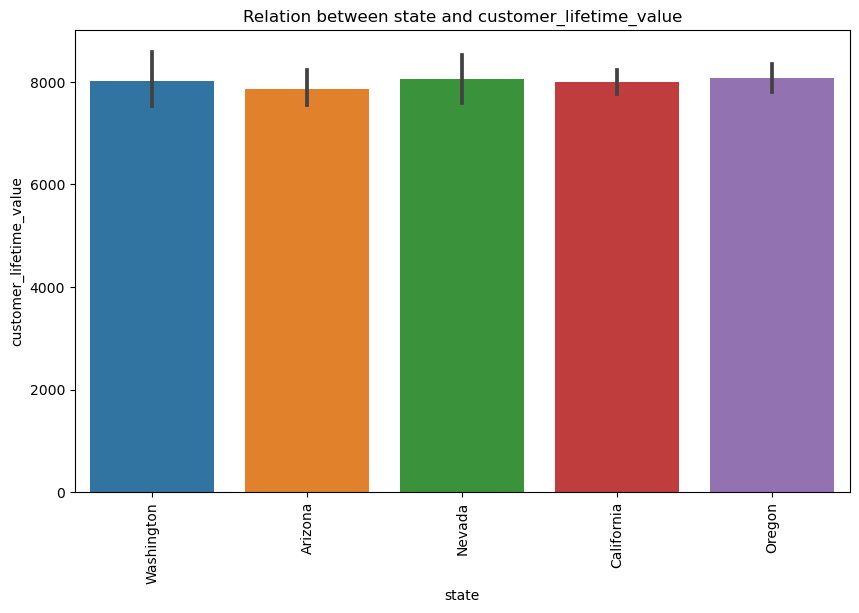

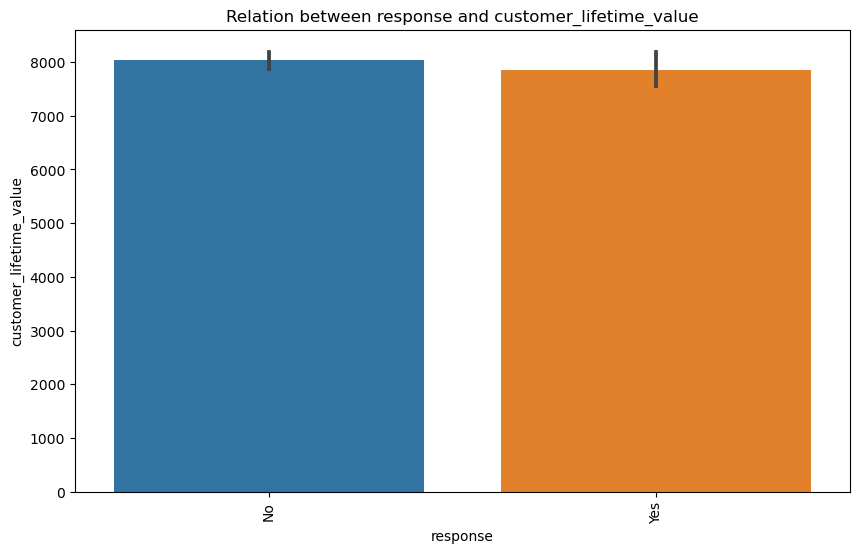

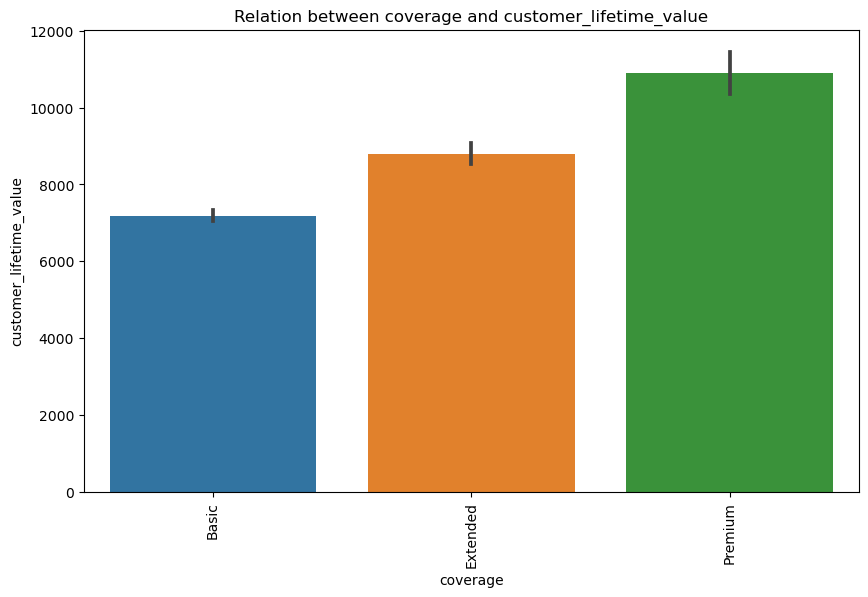

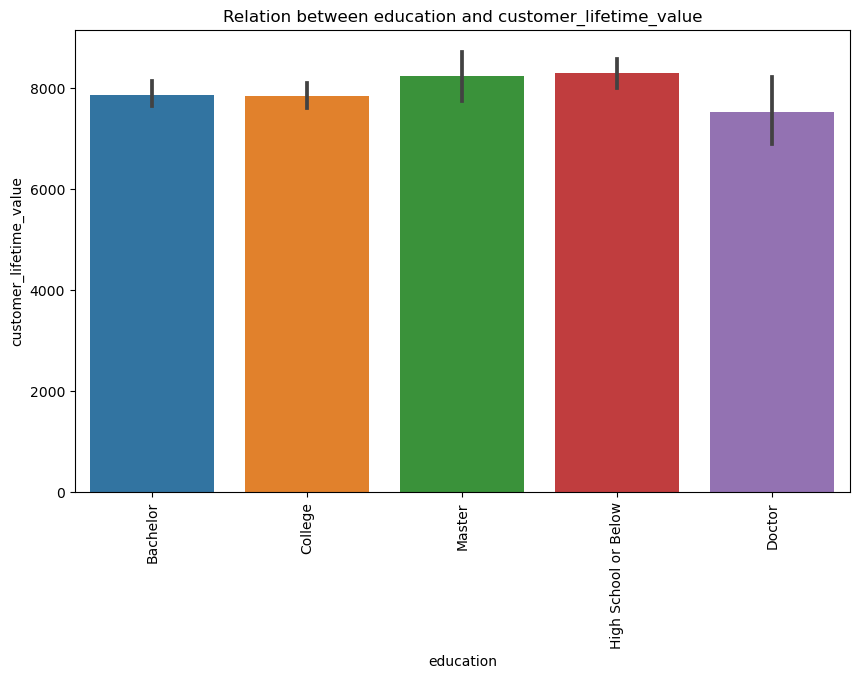

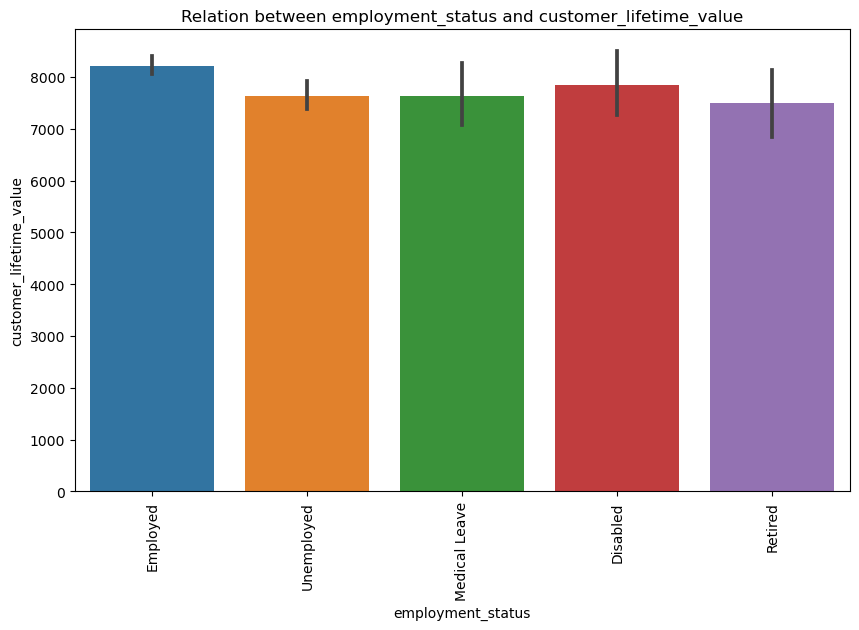

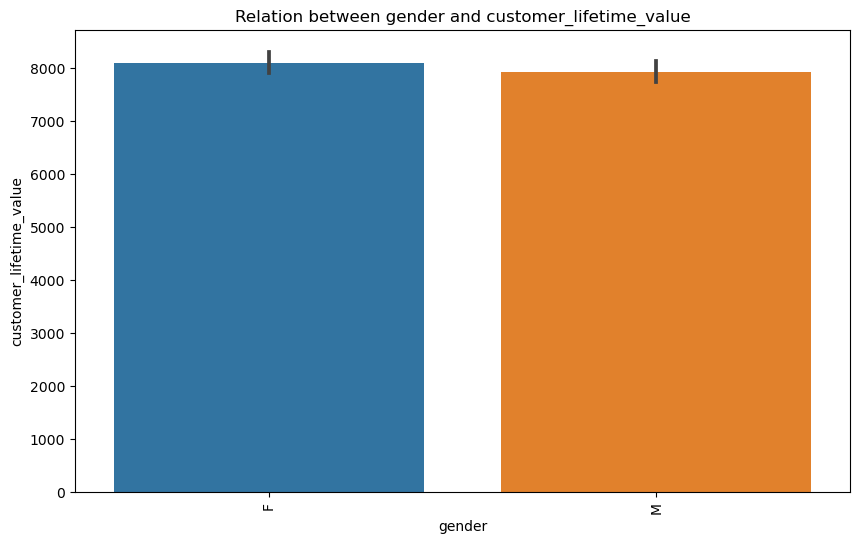

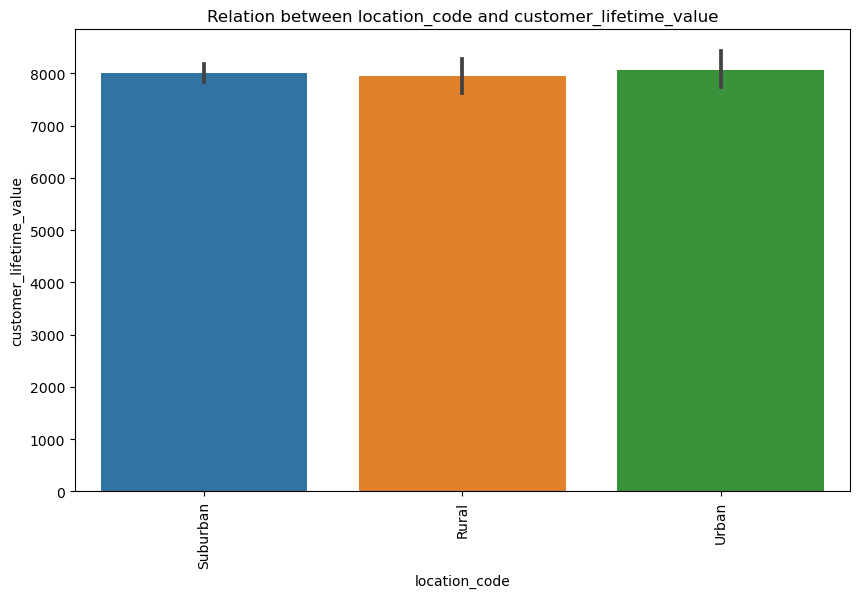

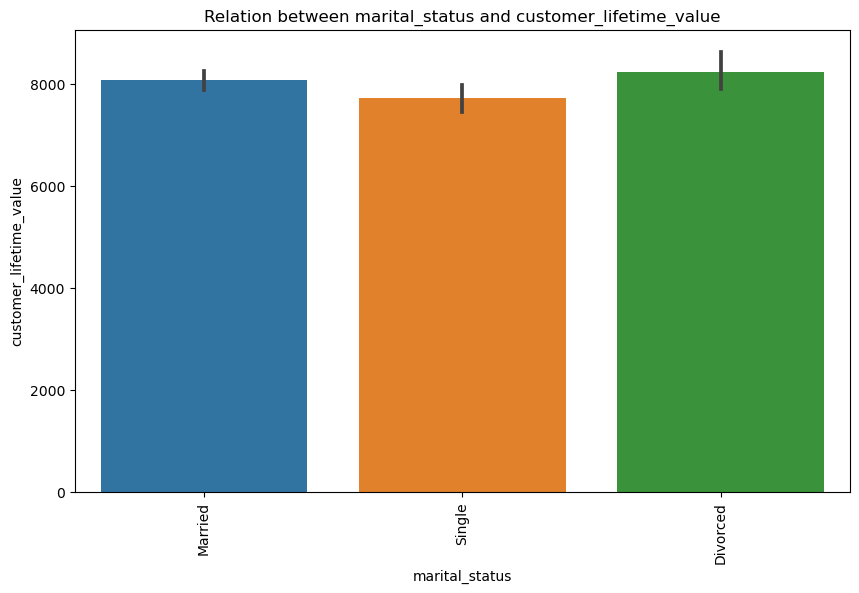

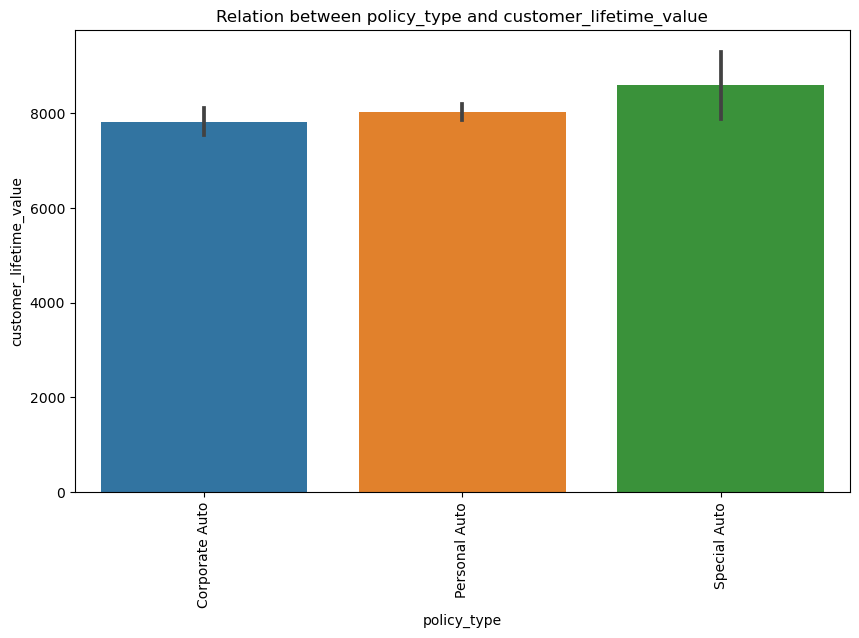

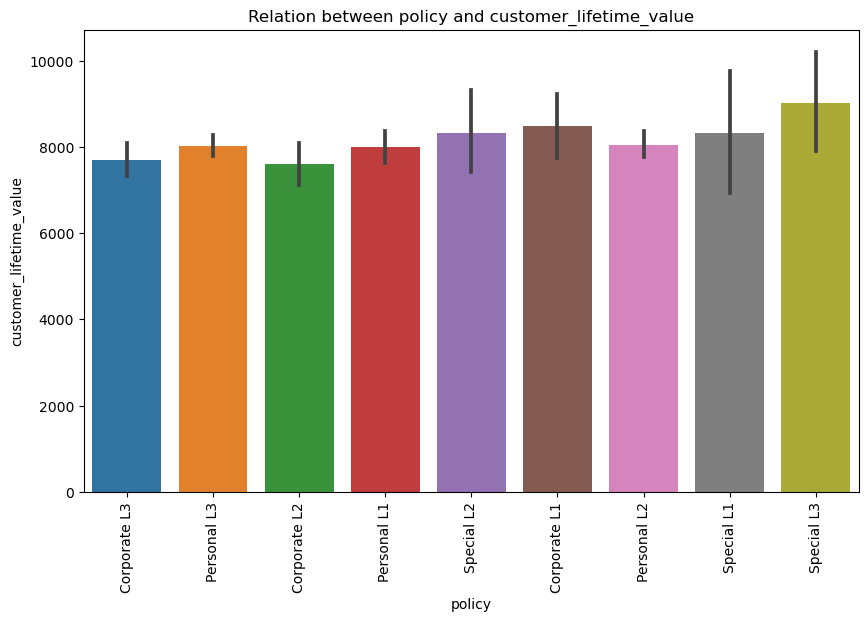

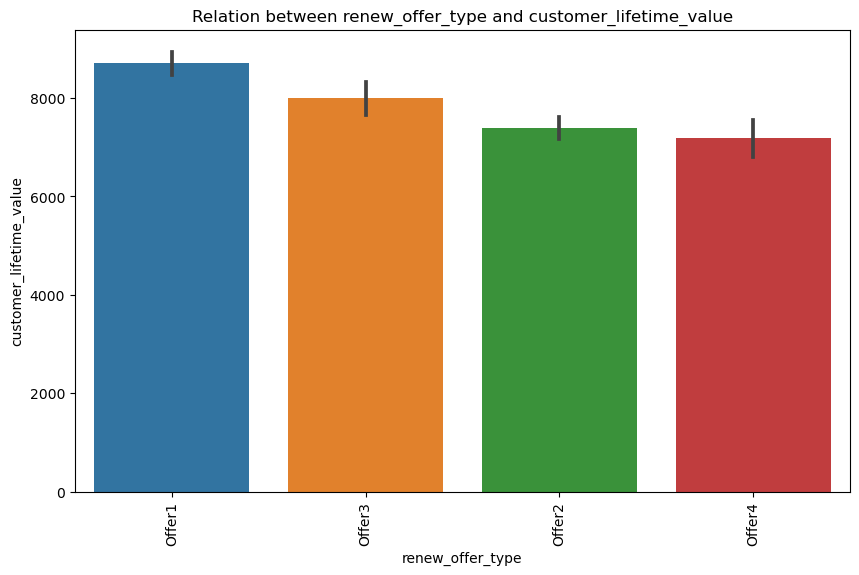

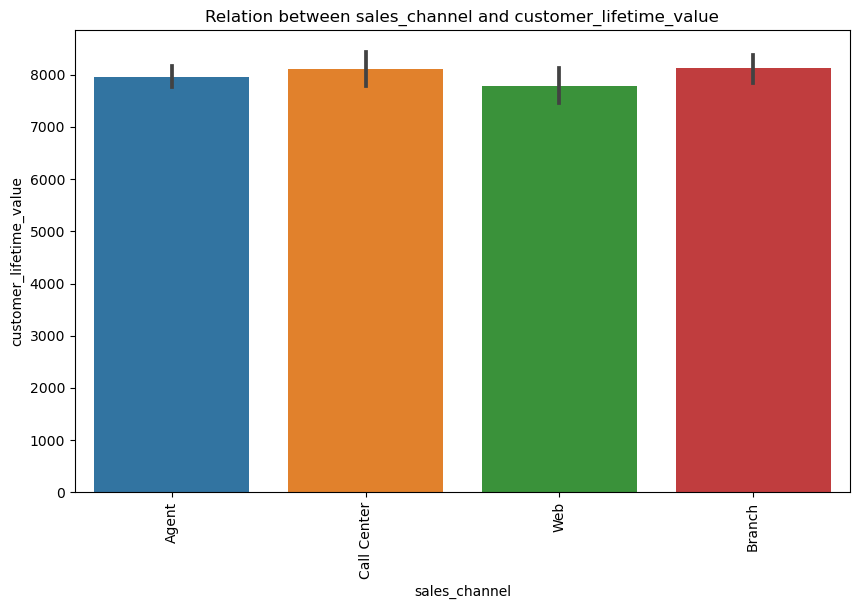

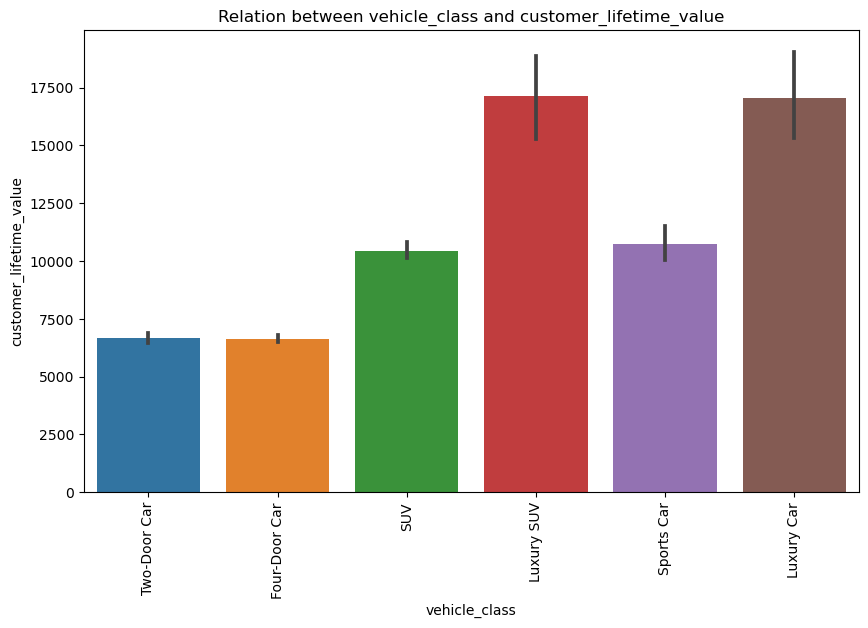

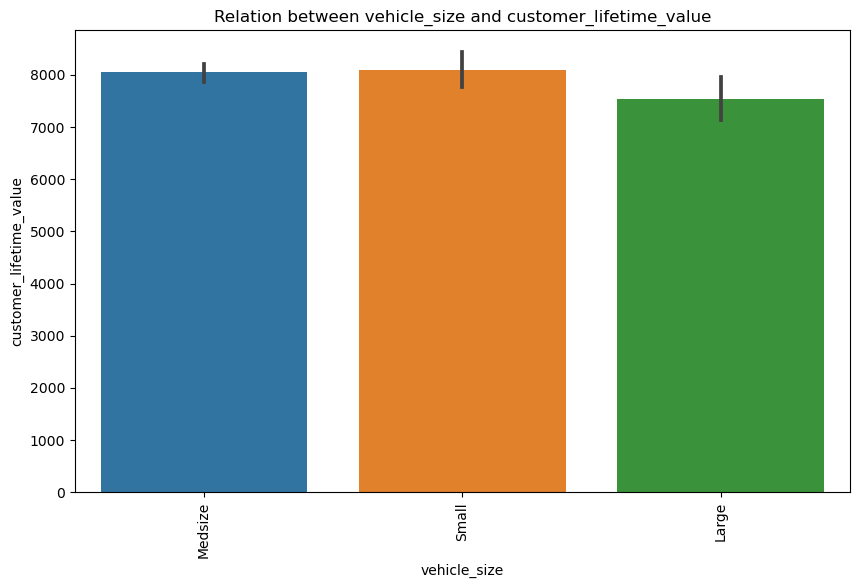

In [28]:
#Here are the categorical data in plots.

import seaborn as sns
import matplotlib.pyplot as plt

for column in categorical_df.columns:
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y="customer_lifetime_value", data=customer_df)
    plt.title(f"Relation between {column} and customer_lifetime_value")
    plt.xlabel(column)
    plt.ylabel("customer_lifetime_value")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
#I can see that except for "Vehicule_class" most of the categories are pretty even.